# Open and show one measurement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from lifa.licel import LicelLidarMeasurement

In [2]:
# Measurements directories to compare
directory = './sample_data/measurement_1'
directory = 'd:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\arquivos ok'

# Licel file wildcard (usually files starts with a, so a*.* is a good wildcard)
file_wildcard = 'a*.*'

# Get files list in each directory
files = glob.glob(os.path.join(directory,file_wildcard))

# Read files
measurements = LicelLidarMeasurement(files)

<>:3: SyntaxWarning: invalid escape sequence '\L'
<>:3: SyntaxWarning: invalid escape sequence '\L'
C:\Users\jairo\AppData\Local\Temp\ipykernel_4716\3267557678.py:3: SyntaxWarning: invalid escape sequence '\L'
  directory = 'd:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\arquivos ok'


## Subset

In [3]:
# Show list of channels
print(measurements.channels.keys())

odict_keys([])


In [4]:
# Licel Channels of interest
licel_channels_names = ['00355.o_an', '00395.s_an', '00353.o_an', '00371.o_an', '00395.p_an', '00460.o_an']

# Subset by channels
measurements_channels = measurements.subset_by_channels(licel_channels_names)

# Subset by bins
bin_min = 50
bin_max = 300
measurements_bins = measurements_channels.subset_by_bins(bin_min,bin_max)

KeyError: '00355.o_an'

# Plot

NameError: name 'measurements_bins' is not defined

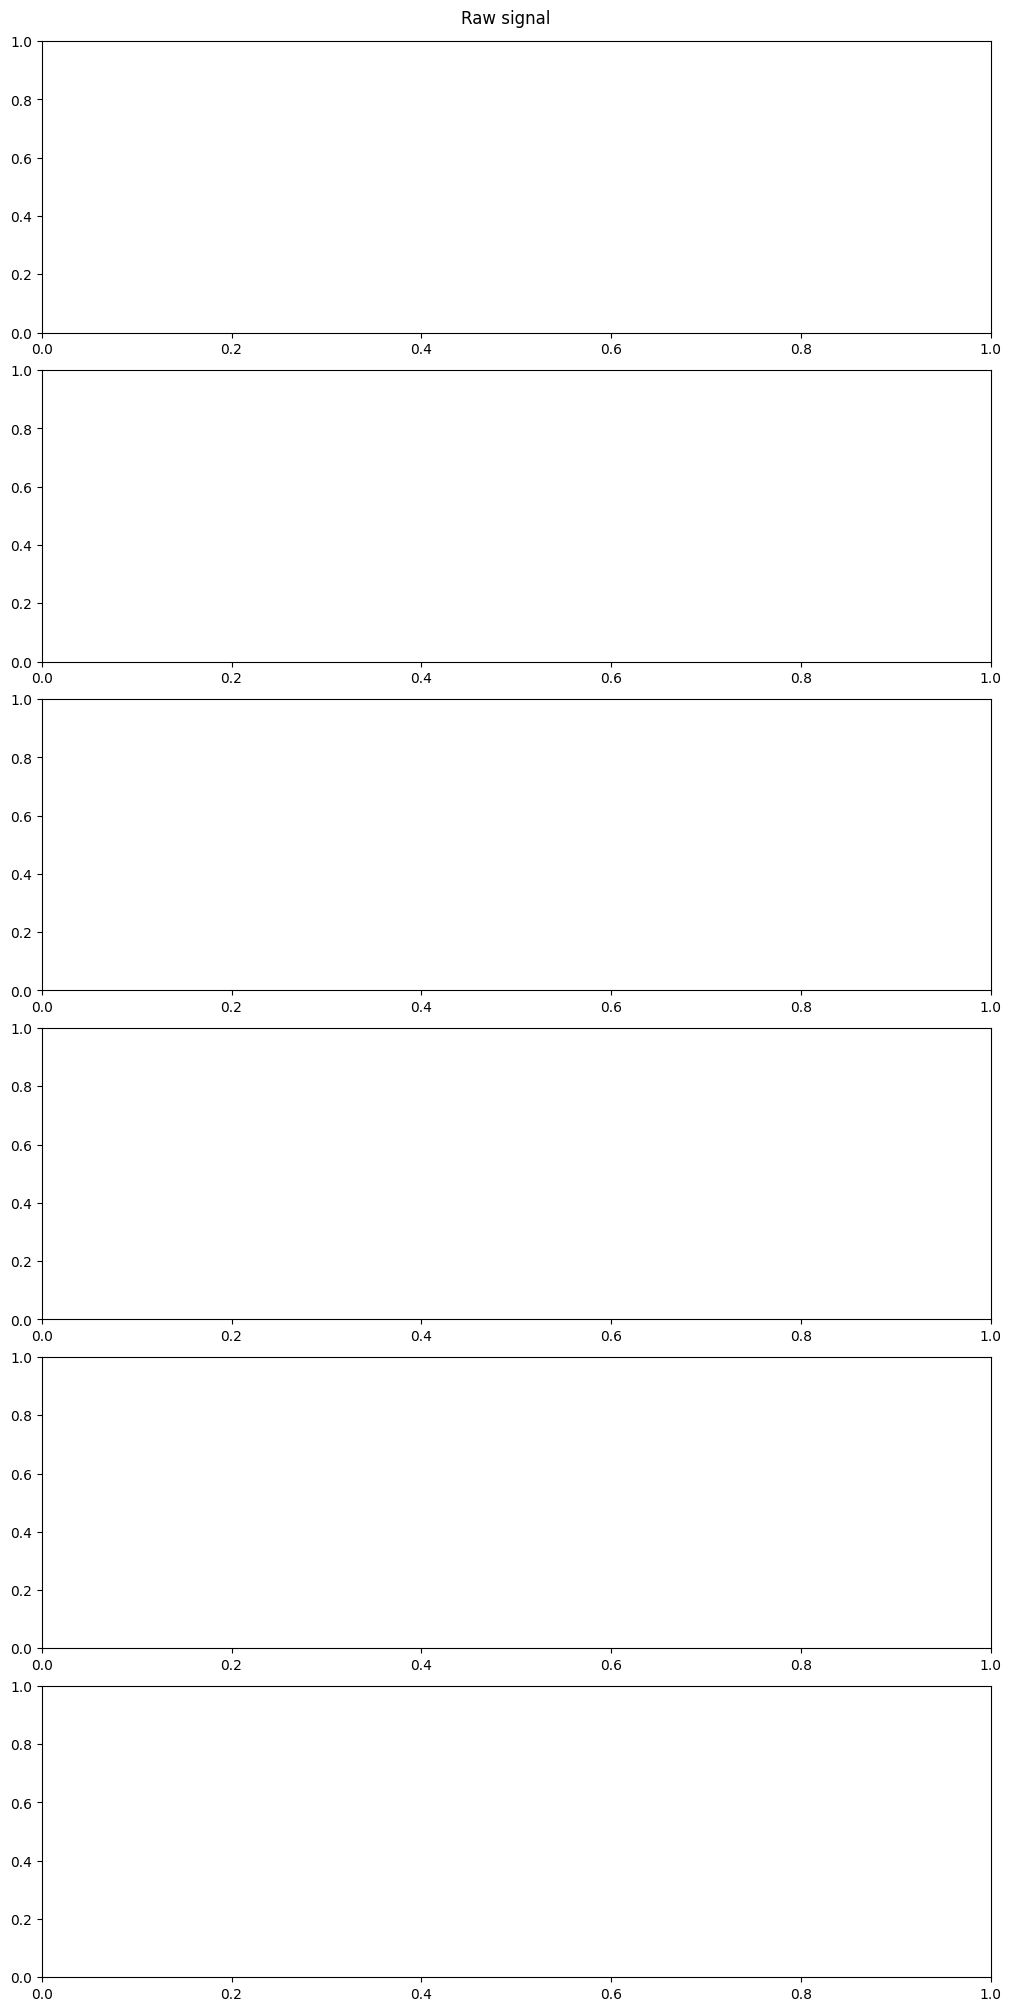

In [5]:
number_traces = len(licel_channels_names)
fig, ax = plt.subplots(nrows=number_traces, figsize=(10,20), layout='constrained')
fig.suptitle('Raw signal')
for i, (channel_name, data) in enumerate(measurements_bins.channels.items()):
    for time, trace in data.data.items():
        ax[i].plot(data.z, trace, label=time, marker=',')
        ax[i].set_title(channel_name)
        ax[i].grid(True, 'both')
        ax[i].minorticks_on()
        ax[i].set_xlabel('distance (m)')
        ax[i].set_ylabel('signal (mV)')
        ax[i].legend(loc = "upper right")

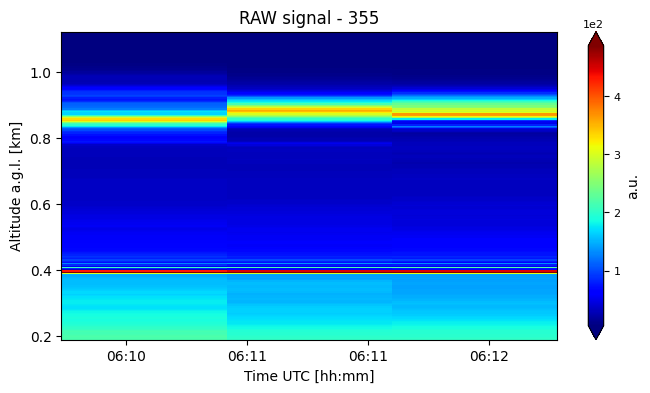

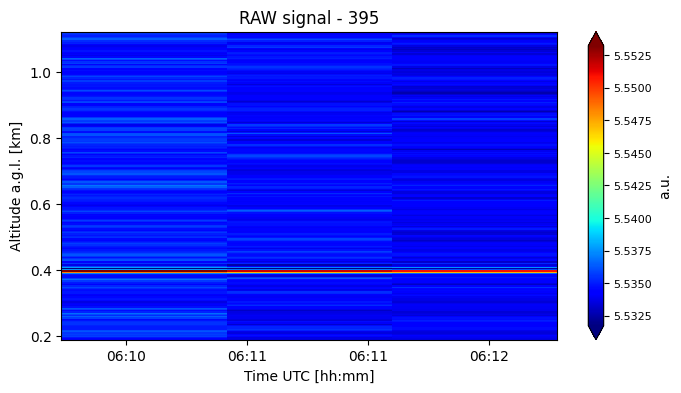

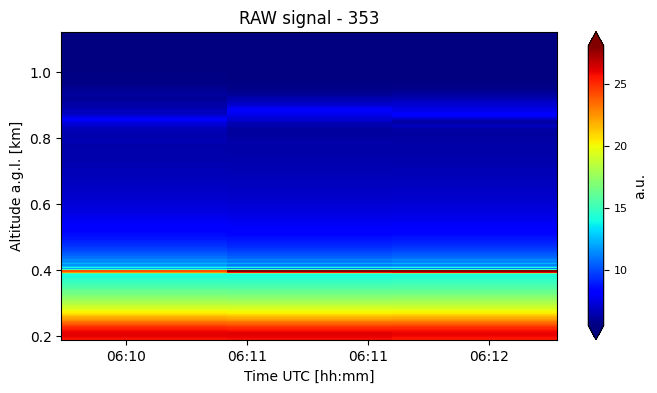

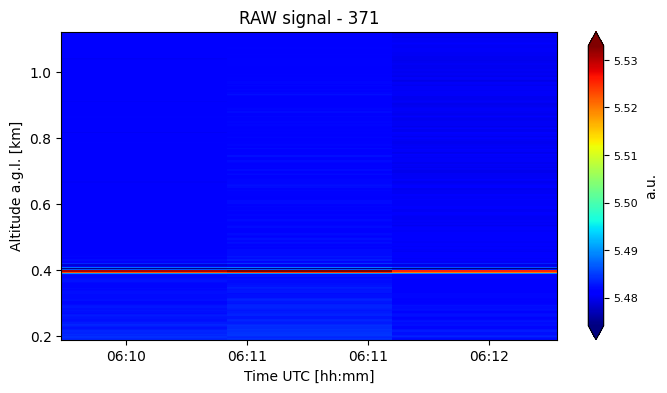

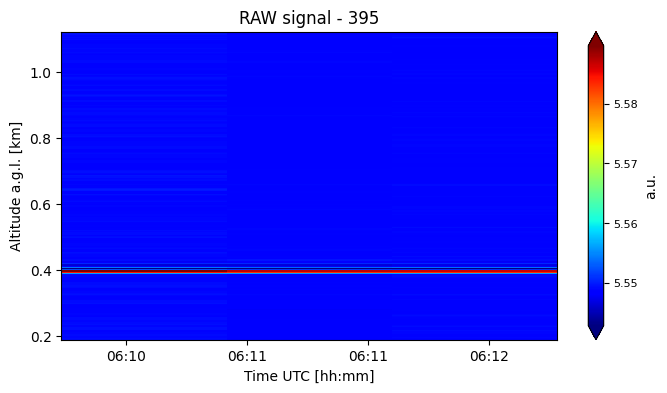

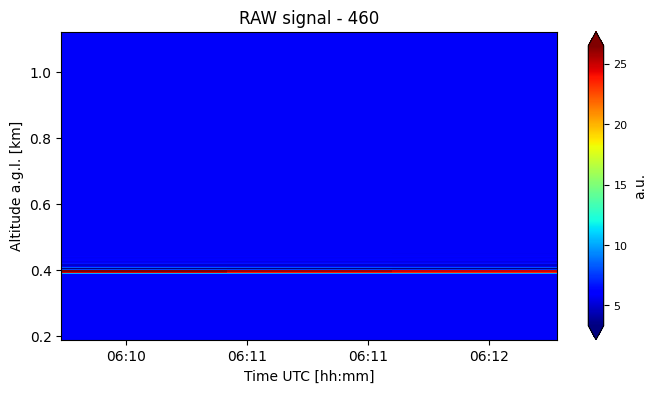

In [46]:
measurements_bins.plot(signal_type='raw')